# All beam geometries

Paper: [_Optimal laser focusing for positron production in laser-electron scattering_, Óscar Amaro and Marija Vranic 2021 New J. Phys. __23__ 115001](https://iopscience.iop.org/article/10.1088/1367-2630/ac2e83)

Preprint: https://arxiv.org/abs/2106.01877

In this notebook we plot the analytical expressions for the a0eff distributions in a short, thin, and wide beam geometries.

In [2]:
import os
import sys
sys.path.append('../QScatter')
import QScatter
from QScatter import *

In [2]:
## parameters
# laser
a0 = 1; #[]
lbd = 1; #[\mu m]
Nb = 1; #[]
nb = 1; #[\mu m ^-3] not necessarily a realistic value

# a
adim = 200; #[]
alst = np.linspace(0.01*a0,0.999*a0,adim); #[]

W0 = 2
zR = pi*W0**2/lbd

In [3]:
aShort_y1, aShort_x1 = dNda_Short_3D(a=alst, a0=a0, R=W0, W0=W0, lbd=lbd, DeltaL=0, DeltaT=0), alst
aShort_y2, aShort_x2 = dNda_Short_3D(a=alst, a0=a0, R=W0*3/2, W0=W0, lbd=lbd, DeltaL=0, DeltaT=0), alst
aShort_y3, aShort_x3 = dNda_Short_3D(a=alst, a0=a0, R=W0*100, W0=W0, lbd=lbd, DeltaL=0, DeltaT=0), alst

aThin_y1, aThin_x1 = dNda_Thin_3D(a=alst, a0=a0, L=2*zR, W0=W0, lbd=lbd, DeltaL=0), alst
aThin_y2, aThin_x2 = dNda_Thin_3D(a=alst, a0=a0, L=10*zR, W0=W0, lbd=lbd, DeltaL=0), alst
aThin_y3, aThin_x3 = dNda_Thin_3D(a=alst, a0=a0, L=10000, W0=W0, lbd=lbd, DeltaL=0), alst

aWide_y1, aWide_x1 = dNda_Wide_3D(a=alst, a0=a0, L=2*zR, W0=W0, lbd=lbd, DeltaL=0), alst
aWide_y2, aWide_x2 = dNda_Wide_3D(a=alst, a0=a0, L=10*zR, W0=W0, lbd=lbd, DeltaL=0), alst
aWide_y3, aWide_x3 = dNda_Wide_3D(a=alst, a0=a0, L=10000, W0=W0, lbd=lbd, DeltaL=0), alst

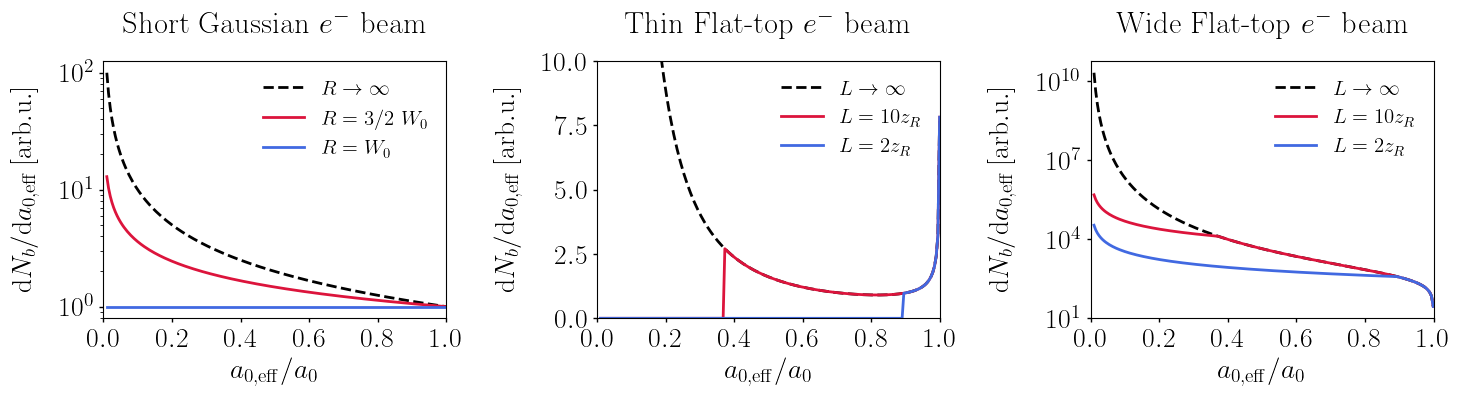

In [4]:
plt.style.use("../QScatter/style.txt")
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

indx = -1
axes[0].plot(aShort_x3, aShort_y3/aShort_y3[indx],'k--',label=r'$R\rightarrow \infty$')
axes[0].plot(aShort_x2, aShort_y2/aShort_y2[indx],'crimson',label=r'$R=3/2~W_0$')
axes[0].plot(aShort_x1, aShort_y1/aShort_y1[indx],'royalblue',label=r'$R=W_0$')
axes[0].set_yscale('log')
axes[0].set_xlabel(r'$a_{0,\mathrm{eff}}/a_0$')
axes[0].set_ylabel(r'$\mathrm{d}N_b/\mathrm{d}a_{0,\mathrm{eff}} \left[ \mathrm{arb. u.} \right]$',labelpad=15)
axes[0].set_title(r"Short Gaussian $e^-$ beam")
axes[0].legend(ncol=1,frameon=False)
# aspect
axes[0].set_box_aspect(aspect=3/4)

indx = -20
axes[1].plot(aThin_x3, aThin_y3/aThin_y3[indx],'k--',label=r'$L\rightarrow \infty$')
axes[1].plot(aThin_x2, aThin_y2/aThin_y2[indx],'crimson',label=r'$L=10z_R$')
axes[1].plot(aThin_x1, aThin_y1/aThin_y1[indx],'royalblue',label=r'$L=2z_R$')
axes[1].set_xlabel(r'$a_{0,\mathrm{eff}}/a_0$')
axes[1].set_ylabel(r'$\mathrm{d}N_b/\mathrm{d}a_{0,\mathrm{eff}} \left[ \mathrm{arb. u.} \right]$',labelpad=15)
axes[1].set_title(r"Thin Flat-top $e^-$ beam")
axes[1].set_ylim([0,10])
axes[1].legend(frameon=False)
# aspect
xmin, xmax = axes[1].get_xlim()
ymin, ymax = axes[1].get_ylim()
axesratio = (ymax-ymin)/(xmax-xmin)
axes[1].set_box_aspect(aspect=3/4)

axes[2].plot(aWide_x3, aWide_y3,'k--',label=r'$L\rightarrow \infty$')
axes[2].plot(aWide_x2, aWide_y2,'crimson',label=r'$L=10z_R$')
axes[2].plot(aWide_x1, aWide_y1,'royalblue',label=r'$L=2z_R$')
axes[2].set_yscale('log')
axes[2].set_xlabel(r'$a_{0,\mathrm{eff}}/a_0$')
axes[2].set_ylabel(r'$\mathrm{d}N_b/\mathrm{d}a_{0,\mathrm{eff}} \left[ \mathrm{arb. u.} \right]$',labelpad=15)
axes[2].set_title(r"Wide Flat-top $e^-$ beam")
axes[2].legend(frameon=False)
# aspect
axes[2].set_box_aspect(aspect=3/4)
axes[2].set_yticks([1e1,1e4,1e7,1e10])

for i in range(3):
    axes[i].set_xticks([0,0.2,0.4,0.6,0.8,1])

# final
plt.tight_layout()
#plt.savefig('geometries.pdf',transparent=True)
plt.show()